In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Cancer Recognization Project:

In [3]:
from sklearn.datasets import load_breast_cancer   ## will give us standard dataset
bc = load_breast_cancer()
print(bc.DESCR)     ## so you can see description of data that it has 569 Instances(samples) with 30 features(Attributes)

## and with this data we want to know what is the situation of each person? is she/he healthy(0) or sick(1)?


## here we have dataset with 2 classes

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Dataset info :

In [35]:
bc.target[0], bc.target[500]

## person number 0 is healthy but person number 500 is sick

(0, 1)

In [36]:
bc.target.shape

## will show us labels(targets, y), the result of 569 pople examination

(569,)

In [37]:
bc.data[0],bc.data[500]

## 29 features + 1 label for person number0 and 500 but it is not understandable for us so we have to use MACHINE LEARNING

(array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]),
 array([1.504e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
        7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
        2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
        1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
        1.135e-01, 2.176e-01, 1.856e-01, 1.018e-01, 2.177e-01, 8.549e-02]))

In [38]:
bc.data.shape

## I have 569 people that each of them has 30 features

(569, 30)

## Preprocessing :

In [4]:
### train_test_split:


from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(bc.data,bc.target, test_size = 0.2 )

In [5]:
print(f"Feature=> train: {x_train.shape} - test: {x_test.shape}")
print(f"Label=> train: {y_train.shape} - test: {y_test.shape}")

## Feature=> train: (455, 30) - test: (114, 30) : 455 sample is ready as train data with 30 features and 114 sample is ready as train data with 30 features
## Label=> train: (455,) - test: (114,) : tere are 445 label for training and 114 label for testing 


Feature=> train: (455, 30) - test: (114, 30)
Label=> train: (455,) - test: (114,)


In [41]:
## To check data:
x_train[0]

## you can see that values are not between 0 and 1 so we have to normalize them

array([1.444e+01, 1.518e+01, 9.397e+01, 6.401e+02, 9.970e-02, 1.021e-01,
       8.487e-02, 5.532e-02, 1.724e-01, 6.081e-02, 2.406e-01, 7.394e-01,
       2.120e+00, 2.120e+01, 5.706e-03, 2.297e-02, 3.114e-02, 1.493e-02,
       1.454e-02, 2.528e-03, 1.585e+01, 1.985e+01, 1.086e+02, 7.669e+02,
       1.316e-01, 2.735e-01, 3.103e-01, 1.599e-01, 2.691e-01, 7.683e-02])

In [6]:
## Standardize

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))   
x_train = scaler.fit_transform(x_train)     ## will fit all MIN and MAX values of scaler in terms of 'x_train' and then will transform to the new features that are between 0 and 1
x_test = scaler.transform(x_test)           ## we don't fit because we consider don't have this test data

In [43]:
# check data

x_train[0]

# we can see that our values are between 0 and 1 (are normalized) how???????
## with MinMaxScaler: this attribute will consider MAX and MIN of first feature for all 569 people. it repeate 30 time for all features and then will write these values  

array([0.35302191, 0.18498478, 0.34676249, 0.21064687, 0.36861929,
       0.25372677, 0.19885192, 0.2749503 , 0.33535354, 0.22851727,
       0.04674995, 0.08341993, 0.06422278, 0.02611725, 0.18471573,
       0.15560129, 0.10250165, 0.36503667, 0.09368492, 0.07201344,
       0.28175027, 0.2086887 , 0.28980527, 0.14296599, 0.39906227,
       0.23887417, 0.24784345, 0.54948454, 0.22195939, 0.14292273])

## Classification:




In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_train,y_pred_train) 
    acc_test = accuracy_score(y_test,y_pred_test) 
    
    p = precision_score(y_test,y_pred_test)
    r = recall_score(y_test,y_pred_test)
    
    print(f"acc_train: {acc_train} - acc_test: {acc_test} - precision: {p} - recall: {r}" )
    
    return acc_train, acc_test, p, r


## 1) Naive Bayes:

In [8]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [9]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9340659340659341 - acc_test: 0.9035087719298246 - precision: 0.9054054054054054 - recall: 0.9436619718309859


## 2) KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree',leaf_size= 28)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [11]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

# model is so good because we don't have any interval between train and test data

acc_train: 0.9736263736263736 - acc_test: 0.956140350877193 - precision: 0.9583333333333334 - recall: 0.971830985915493


## 3) Decision Trees:

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 64,min_samples_split = 2, criterion= 'gini')
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=64)

In [13]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

## if in acc_train we had 97% and in "acc_test" had 91% ,it was verfit because the interval of them are alot (if : max_depth = 128,min_samples_split = 4, criterion= 'entropy')
## but in(max_depth = 64,min_samples_split = 2, criterion= 'gini') we can see all evaluations are higher

acc_train: 1.0 - acc_test: 0.9298245614035088 - precision: 0.9436619718309859 - recall: 0.9436619718309859


## 4)RANDOM FOREST:

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, max_depth =32 ,min_samples_split = 4)   ## n_estimators: the number of trees that you want to evaluate
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=32, min_samples_split=4, n_estimators=1000)

In [20]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

## if: (n_estimators = 500, max_depth =64 ,min_samples_split = 8 ) the result will be (acc_train: 0.9956043956043956 - acc_test: 0.9385964912280702 - precision: 0.9324324324324325 - recall: 0.971830985915493)

acc_train: 1.0 - acc_test: 0.9385964912280702 - precision: 0.9324324324324325 - recall: 0.971830985915493


## 5) SVM:

In [24]:
from sklearn.svm import SVC

svm = SVC(kernel="poly")   ## some of SVC parameters are: "rbf" with circle boundary, "poly" is polynomial and "sigmoid"
svm.fit(x_train,y_train)

SVC(kernel='poly')

In [25]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

## if I had svm = SVC() the result would be : acc_train: 0.9912087912087912 - acc_test: 0.9473684210526315 - precision: 0.9452054794520548 - recall: 0.971830985915493

acc_train: 0.9912087912087912 - acc_test: 0.9385964912280702 - precision: 0.9444444444444444 - recall: 0.9577464788732394


## 6) LOGISTIC REGRESSION :

In [27]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [29]:
y_pred_train= lr.predict(x_train)
y_pred_test= lr.predict(x_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

## it is important that " recall: 1.0 " so 100% of patient are recognized truely

acc_train: 0.9736263736263736 - acc_test: 0.956140350877193 - precision: 0.9342105263157895 - recall: 1.0


## 7) ANN:

In [38]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=256, activation='relu',solver='adam', batch_size=64)  ## hidden_layer_sizes: the number of neurons in the middle layer or Model Complexity
ann.fit(x_train,y_train)

## batch_size=64 : instead of training on each features, applying train on each 64 package(ru packagehaye 64 taii train mikone )

C:\Users\Marjan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=64, hidden_layer_sizes=256)

In [39]:
y_pred_train= ann.predict(x_train)
y_pred_test= ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

## if we had(hidden_layer_sizes=512, activation='relu',solver='adam') the result would be acc_train: 0.989010989010989 - acc_test: 0.9736842105263158 - precision: 0.9594594594594594 - recall: 1.0
## if we had(hidden_layer_sizes=1024, activation='tanh',solver='lbfgs') the result would be acc_train: 1.0 - acc_test: 0.9473684210526315 - precision: 0.9577464788732394 - recall: 0.9577464788732394
## if we had(hidden_layer_sizes=256, activation='relu',solver='sgd') the result would be acc_train: 0.9230769230769231 - acc_test: 0.9210526315789473 - precision: 0.8875 - recall: 1.0

acc_train: 0.9912087912087912 - acc_test: 0.9736842105263158 - precision: 0.9594594594594594 - recall: 1.0


## Comparison:

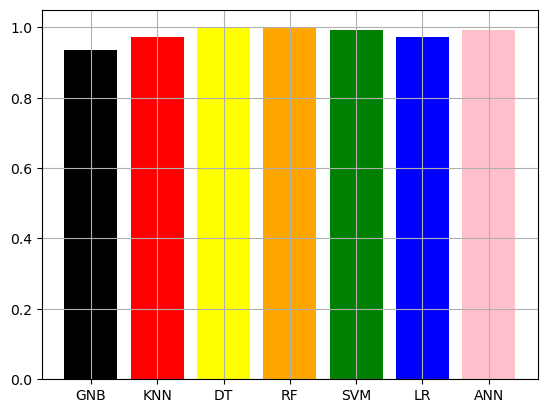

In [43]:
## compairing all algorithms accuracy on the train data:
acc_train = [acc_train_gnb,acc_train_knn,acc_train_dt,acc_train_rf,acc_train_svm,acc_train_lr,acc_train_ann]

## Now we want to plot a biechart to compare all accuracies in train data that in x_axis be name of algorithm and y_axis be accuracies 
title = ['GNB','KNN','DT','RF','SVM','LR','ANN'] 
colors = ['black','red','yellow','orange','green','blue','pink']
plt.bar(title,acc_train,color=colors) ## title will sit on the x_axis and acc_train will sit on the y_axis
plt.grid()
plt.show()

## now the accuracy of "DT" and "RF" are the best models for train data and then "SVM" and "ANN" are good models for train data too

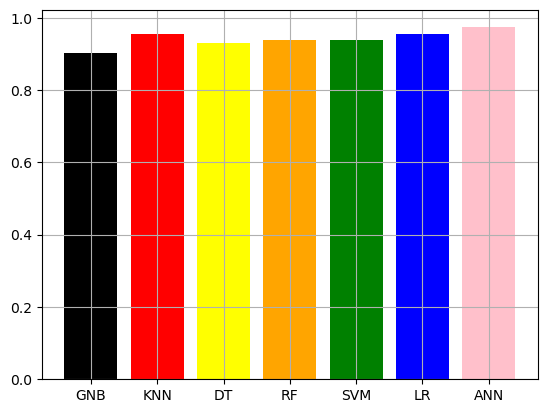

In [44]:
## ## compairing all algorithms accuracy on the test data:
acc_test = [acc_test_gnb,acc_test_knn,acc_test_dt,acc_test_rf,acc_test_svm,acc_test_lr,acc_test_ann]

title = ['GNB','KNN','DT','RF','SVM','LR','ANN'] 
colors = ['black','red','yellow','orange','green','blue','pink']
plt.bar(title,acc_test,color=colors) 
plt.grid()
plt.show()

## we can see that the accuracy of "DT" on the train data was 100% but on the test data is less than the other models so it is totaly overfited
## and accuracy of "ANN" that was not 100% in the train data, now has highest accuracy in the test data 

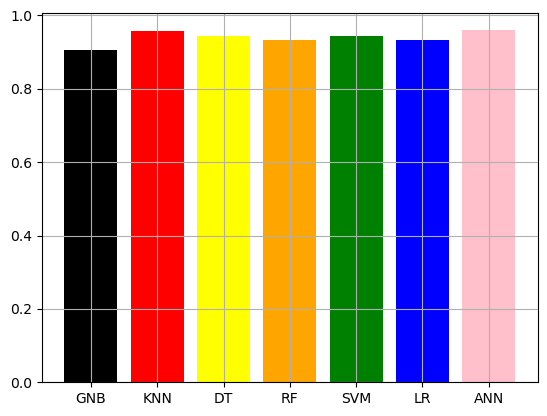

In [46]:
## Now we want to compare their percisions on the test data:
p_test = [p_gnb,p_knn,p_dt,p_rf,p_svm,p_lr,p_ann]

title = ['GNB','KNN','DT','RF','SVM','LR','ANN'] 
colors = ['black','red','yellow','orange','green','blue','pink']
plt.bar(title,p_test,color=colors) 
plt.grid()
plt.show()


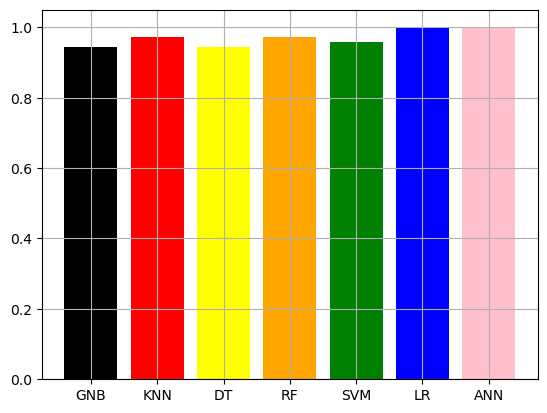

In [47]:
## Now we want to compare their Recall on the test data:
r_test = [r_gnb,r_knn,r_dt,r_rf,r_svm,r_lr,r_ann]

title = ['GNB','KNN','DT','RF','SVM','LR','ANN'] 
colors = ['black','red','yellow','orange','green','blue','pink']
plt.bar(title,r_test,color=colors) 
plt.grid()
plt.show()

# 2. The project of identifying the numbers 0 to 1 in the input image:

In [117]:
from sklearn.datasets import load_digits
digits = load_digits()    ## digits is a name of dataset that I want to load it
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [110]:
digits.target.shape

## in DESCR we saw 1797 sample and their 64 attribute(features)
## Now with "shape" we can see that we have 1797 sample as target or Y or labels

(1797,)

In [111]:
digits.data.shape
## and  with "shape" we can see that we have 1797 sample as  or X with their 64 attribute or features in a 1 dimention or in a 8x8 matrix


(1797, 64)

In [112]:
digits.images.shape

## these 1797 samples are in 8*8 images

(1797, 8, 8)

 This is number 5


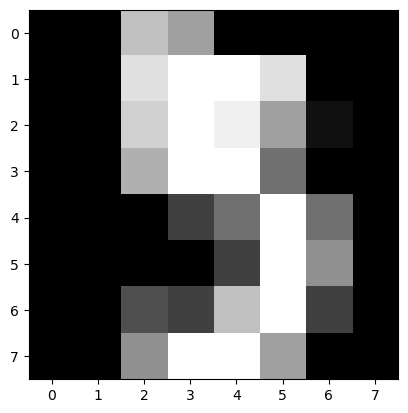

In [113]:
## By matplotlib I want to show a image of them

import matplotlib.pyplot as plt 

x = digits.images[5]   ## I want to see one of these images(here for example the 5th image I want to see)

print(f" This is number {digits.target[5]}")
plt.gray()
plt.imshow(x) ## imshow() : because I want to see an/some image/s 

plt.show()


## so you can see that our inputs are some images and we want to give them to some differents algorithm 

## Preprocessing:

### Split tarin and test data


In [118]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3) ## we don't use images because we want 2 dimention vector(images is a 3 dimention vector)
x_train[0]

array([ 0.,  0.,  1., 11., 14.,  6.,  0.,  0.,  0.,  0.,  4., 16., 14.,
        4.,  0.,  0.,  0.,  0., 12., 16.,  2.,  0.,  0.,  0.,  0.,  2.,
       16., 16., 12.,  5.,  0.,  0.,  0.,  7., 16., 16., 16., 16.,  3.,
        0.,  0.,  3., 15.,  5.,  0., 15., 13.,  0.,  0.,  0., 11., 16.,
       14., 16., 10.,  0.,  0.,  0.,  0., 12., 13.,  9.,  1.,  0.])

In [119]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train[0]

array([0.        , 0.        , 0.0625    , 0.6875    , 0.875     ,
       0.375     , 0.        , 0.        , 0.        , 0.        ,
       0.25      , 1.        , 0.875     , 0.25      , 0.        ,
       0.        , 0.        , 0.        , 0.75      , 1.        ,
       0.125     , 0.        , 0.        , 0.        , 0.        ,
       0.13333333, 1.        , 1.        , 0.75      , 0.3125    ,
       0.        , 0.        , 0.        , 0.5       , 1.        ,
       1.        , 1.        , 1.        , 0.21428571, 0.        ,
       0.        , 0.1875    , 0.9375    , 0.3125    , 0.        ,
       0.9375    , 0.8125    , 0.        , 0.        , 0.        ,
       0.6875    , 1.        , 0.875     , 1.        , 0.625     ,
       0.        , 0.        , 0.        , 0.        , 0.75      ,
       0.8125    , 0.5625    , 0.0625    , 0.        ])

## Performance Metric:

In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_train,y_pred_train) 
    acc_test = accuracy_score(y_test,y_pred_test) 
    
    p = precision_score(y_test,y_pred_test, average='weighted') ## average='weighted': explenation is in the prediction part 
    r = recall_score(y_test,y_pred_test, average='weighted')
    
    print(f"acc_train: {acc_train} - acc_test: {acc_test} - precision: {p} - recall: {r}" )
    
    return acc_train, acc_test, p, r

## Classification :

## 1) Random Forest:

In [126]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 128, n_estimators = 256)
rf.fit(x_train,y_train)


RandomForestClassifier(max_depth=128, n_estimators=256)

In [127]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

## here we have dataset with 10 classes so when we want to run the "def" code will get ERROR because here we have 10 classes in the output and the confusion matrix will not be a 2*2 matrix 
## so you have to set an "average setting" between: 
## 1.micro: all samples have equal share in averaging.(hame nemuneha sahme yeksani dar miangin giri dashte bashan)
## 2.macro: all classes have equal share in averaging.(hame calsha sahme yeksani dar miangin giri dashte bashan)
## 3.weighted: All classes should have a share based on the samples in them.(hame clasha bar asase nemune dakheleshun bayad sahm dashte bashan)
## (masalan agar az addade 0, 100 ta hast va az adade 1,300 ta.sahme adade 1, 3barabare adade 0 hast).
## pas dakhele "def" baraye "Precision" va "Recall" miam "average='weighted'" ro mizaram

acc_train: 1.0 - acc_test: 0.9722222222222222 - precision: 0.9725368433548258 - recall: 0.9722222222222222


## 2) SVM:

In [128]:
from sklearn.svm import SVC

svm = SVC()               ## and if want w can use"kernel='poly' or whatever that we want and compare
svm.fit(x_train,y_train)

SVC()

In [129]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)


acc_train: 0.994431185361973 - acc_test: 0.9888888888888889 - precision: 0.9892909431263469 - recall: 0.9888888888888889


## 3) ANN:

In [131]:
from sklearn.neural_network import MLPClassifier

ann= MLPClassifier(hidden_layer_sizes=256)  ## also you can add "batch_size" and "solver" and "learning_rate='adaptive'"
ann.fit(x_train,y_train)

C:\Users\Marjan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=256)

In [133]:
y_pred_train= ann.predict(x_train)
y_pred_test= ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 1.0 - acc_test: 0.9740740740740741 - precision: 0.9743340467879852 - recall: 0.9740740740740741


## 4)KNN :

In [134]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [135]:
y_pred_train= knn.predict(x_train)
y_pred_test= knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9880668257756563 - acc_test: 0.9703703703703703 - precision: 0.9713084327140221 - recall: 0.9703703703703703


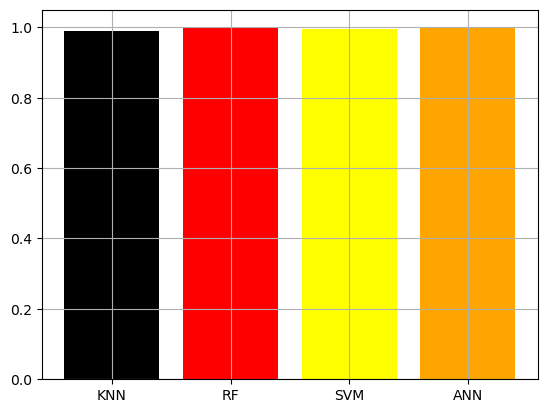

In [136]:
## compairing all algorithms accuracy on the train data:
import matplotlib.pyplot as plt

acc_train = [acc_train_knn, acc_train_rf, acc_train_svm, acc_train_ann]

title = ['KNN','RF','SVM','ANN'] 
colors = ['black','red','yellow','orange']
plt.bar(title,acc_train,color=colors) 
plt.grid()
plt.show()

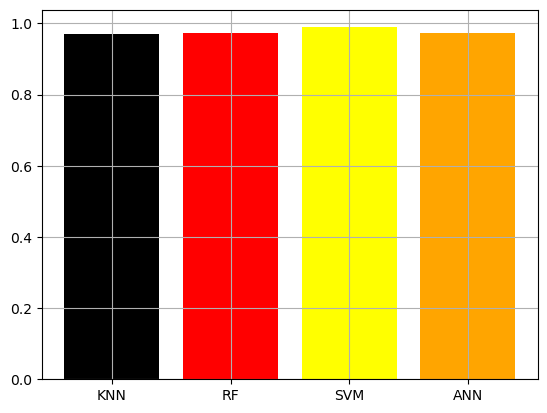

In [137]:
## compairing all algorithms accuracy on the test data:

acc_test = [acc_test_knn, acc_test_rf, acc_test_svm, acc_test_ann]

title = ['KNN','RF','SVM','ANN'] 
colors = ['black','red','yellow','orange']
plt.bar(title,acc_test,color=colors) 
plt.grid()
plt.show()

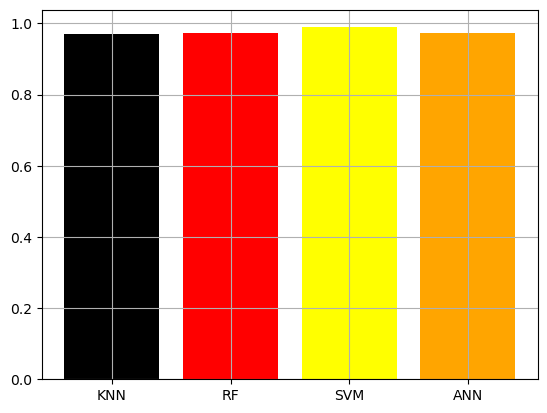

In [141]:
p = [p_knn, p_rf, p_svm, p_ann]

title = ['KNN','RF','SVM','ANN'] 
colors = ['black','red','yellow','orange']
plt.bar(title,p,color=colors) 
plt.grid()
plt.show()

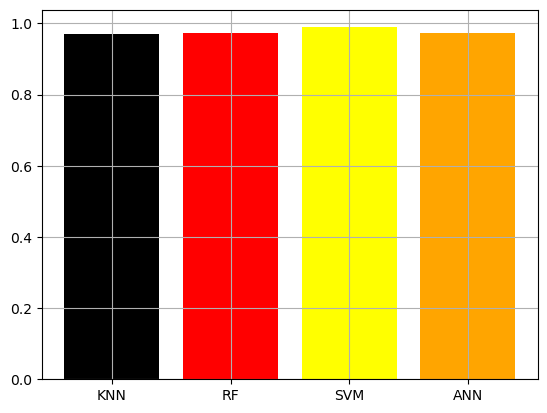

In [142]:
r = [r_knn, r_rf, r_svm, r_ann]

title = ['KNN','RF','SVM','ANN'] 
colors = ['black','red','yellow','orange']
plt.bar(title,r,color=colors) 
plt.grid()
plt.show()

# 3. Project: Using dimension reduction to improve number recognition performance(estefade az kaheshe dimention baraye behbude amalkarde tashkhise adad)

In [143]:
from sklearn.datasets import load_digits
digits = load_digits()    ## digits is a name of dataset that I want to load it
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

 This is number 2


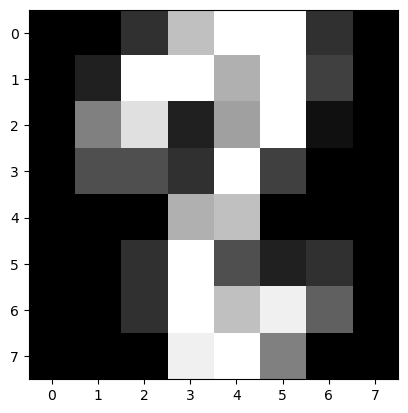

In [144]:
import matplotlib.pyplot as plt 

x = digits.images[700]  

print(f" This is number {digits.target[700]}")
plt.gray()
plt.imshow(x)  

plt.show()


## you can see that both sides of the picture is totaly black and useless so we can remove it by PCA(reduction in dimention)
## why? to increse speed of calculation and reduce unnecessaty data and make simple the calculation

## Preprocessing:

### Split tarin and test data

In [146]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3) ## we don't use images because we want 2 dimention vector(images is a 3 dimention vector)
x_train[0]

array([ 0.,  0.,  4., 13., 16., 14.,  0.,  0.,  0.,  2., 14., 16., 12.,
        4.,  0.,  0.,  0., 13., 16.,  5.,  0.,  0.,  0.,  0.,  0., 11.,
       16., 10.,  1.,  0.,  0.,  0.,  0.,  5., 15., 16.,  5.,  0.,  0.,
        0.,  0.,  0.,  2., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 15.,
        9.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.])

In [147]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train[0]

array([0.        , 0.        , 0.25      , 0.8125    , 1.        ,
       0.875     , 0.        , 0.        , 0.        , 0.125     ,
       0.875     , 1.        , 0.75      , 0.25      , 0.        ,
       0.        , 0.        , 0.8125    , 1.        , 0.3125    ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.73333333, 1.        , 0.625     , 0.0625    , 0.        ,
       0.        , 0.        , 0.        , 0.35714286, 0.9375    ,
       1.        , 0.3125    , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.125     , 0.9375    , 0.5625    ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.3125    , 0.9375    , 0.5625    , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.25      , 1.        ,
       0.3125    , 0.        , 0.        , 0.        ])

## PCA:

I want to reduce dimensionality 

In [148]:
x_train.shape, x_test.shape

((1257, 64), (540, 64))

In [149]:
from sklearn.decomposition import PCA

pca= PCA(n_components=32)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [150]:
x_train.shape, x_test.shape

## Now you can see the reduction in dimension

((1257, 32), (540, 32))

## Performance Metric:

In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_train,y_pred_train) 
    acc_test = accuracy_score(y_test,y_pred_test) 
    
    p = precision_score(y_test,y_pred_test, average='weighted') ## average='weighted': explenation is in the prediction part 
    r = recall_score(y_test,y_pred_test, average='weighted')
    
    print(f"acc_train: {acc_train} - acc_test: {acc_test} - precision: {p} - recall: {r}" )
    
    return acc_train, acc_test, p, r

## Classification :

## 1) Random Forest :

In [152]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 128, n_estimators = 256)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=128, n_estimators=256)

In [153]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 1.0 - acc_test: 0.9740740740740741 - precision: 0.9742619189214761 - recall: 0.9740740740740741


# 2)SVM :

In [154]:
from sklearn.svm import SVC

svm = SVC()               ## and if want w can use"kernel='poly' or whatever that we want and compare
svm.fit(x_train,y_train)

SVC()

In [155]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

## here we don't have overfitting like svm in previous project(64 dimention)

acc_train: 0.9992044550517104 - acc_test: 0.9925925925925926 - precision: 0.9926950409793548 - recall: 0.9925925925925926


## 3) ANN :

In [156]:
from sklearn.neural_network import MLPClassifier

ann= MLPClassifier(hidden_layer_sizes=256)  ## also you can add "batch_size" and "solver" and "learning_rate='adaptive'"
ann.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=256)

In [157]:
y_pred_train= ann.predict(x_train)
y_pred_test= ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

## we have overfitting on ANN like previous project

acc_train: 1.0 - acc_test: 0.9833333333333333 - precision: 0.9836745352050451 - recall: 0.9833333333333333


## 4) KNN :

In [158]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [159]:
y_pred_train= knn.predict(x_train)
y_pred_test= knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9856801909307876 - acc_test: 0.9814814814814815 - precision: 0.9815436337851873 - recall: 0.9814814814814815


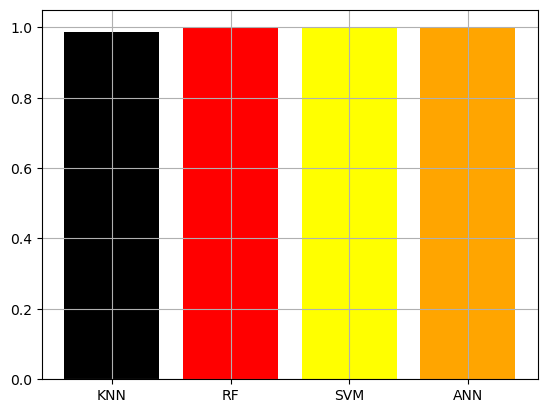

In [160]:
## compairing all algorithms accuracy on the train data:
import matplotlib.pyplot as plt

acc_train = [acc_train_knn, acc_train_rf, acc_train_svm, acc_train_ann]

title = ['KNN','RF','SVM','ANN'] 
colors = ['black','red','yellow','orange']
plt.bar(title,acc_train,color=colors) 
plt.grid()
plt.show()

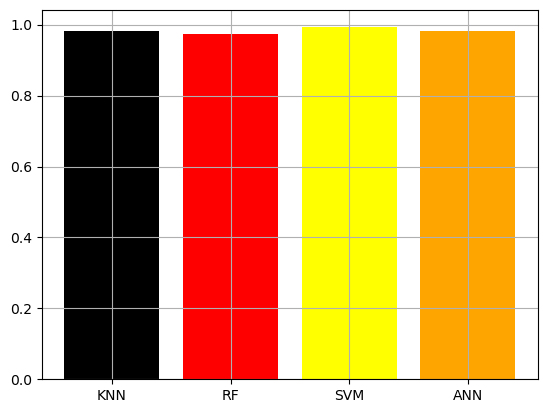

In [161]:
## compairing all algorithms accuracy on the test data:

acc_test = [acc_test_knn, acc_test_rf, acc_test_svm, acc_test_ann]

title = ['KNN','RF','SVM','ANN'] 
colors = ['black','red','yellow','orange']
plt.bar(title,acc_test,color=colors) 
plt.grid()
plt.show()

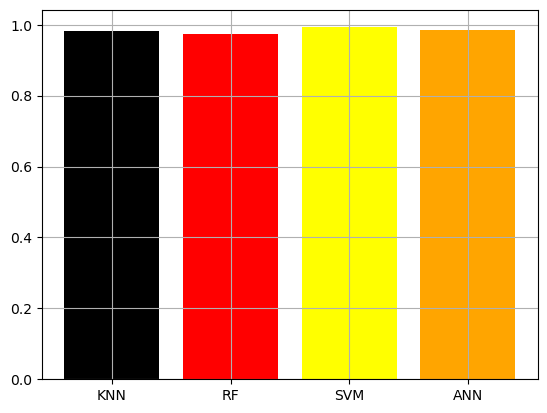

In [162]:
p = [p_knn, p_rf, p_svm, p_ann]

title = ['KNN','RF','SVM','ANN'] 
colors = ['black','red','yellow','orange']
plt.bar(title,p,color=colors) 
plt.grid()
plt.show()

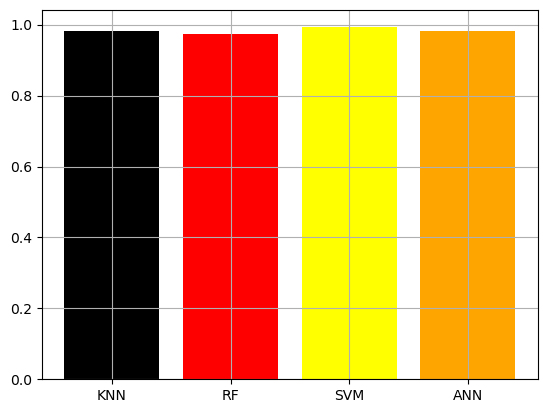

In [163]:
r = [r_knn, r_rf, r_svm, r_ann]

title = ['KNN','RF','SVM','ANN'] 
colors = ['black','red','yellow','orange']
plt.bar(title,r,color=colors) 
plt.grid()
plt.show()